# Derivations for the Radau Quadrature Expressions

This notebook contains the various derivations of the Radau quadrature for use in the Castro SDC solver

In [1]:
from sympy import init_session
init_session()

IPython console for SymPy 1.4 (Python 3.7.4-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.4/



## 2nd Order Radau Formula

For the 2nd order solver, use three points in time, $t^n$, $t^n + \delta t/3$, and $t^n + \delta t$ and we want to do an integral over these that is second order accurate.  

The interpolant that fits through this is

$$p(t) = \frac{3}{2} \frac{\phi_2 - \phi_1}{\delta t} (t - t_1) + \phi_1$$

We then compute the integrals under this line from $[t_0, t_1]$ and $[t_1, t_2]$.

In [2]:
# define the symbols we need
p0, p1, p2 = symbols("phi_0 phi_1 phi_2")
tau = symbols("tau")
t, t1 = symbols("t t_1")

Here is our polynomial, taking t1 = tau/3

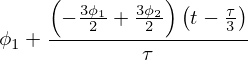

In [3]:
p = Rational(3,2)*(p2-p1)/tau * (t - Rational(1,3)*tau) + p1
p

### Construct the integrals

We integrate over each half of the time domain.  First we compute integral from $t_0$ to $t_1$

In [4]:
q1 = integrate(p, (t, 0, Rational(1,3)*tau))

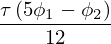

In [5]:
simplify(q1)

Next we compute the integral from $t_1$ to $t_2$

In [6]:
q2 = integrate(p, (t, Rational(1,3)*tau, tau))

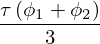

In [7]:
simplify(q2)

Over the total time range, [0, $\tau$]

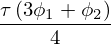

In [8]:
simplify(q1 + q2)

## 4th order Radau

Now we want to fit a parabola to the three points

$$t_1 = \frac{4 - \sqrt{6}}{10} \tau$$
$$t_2 = \frac{4 + \sqrt{6}}{10} \tau$$
$$t_3 = \tau$$

and then the integral is
$$I(\phi) \sim w_1 \phi(t_1) + w_2 \phi(t_2) + w_3 \phi(t_3)$$

with weights

$$w_1 = \frac{16 - \sqrt{6}}{36}$$
$$w_2 = \frac{16 + \sqrt{6}}{36}$$
$$w_3 = \frac{1}{9}$$

In [9]:
nodes = {1: Rational(1,10)*(4-sqrt(6))*tau, 2: Rational(1,10)*(4+sqrt(6))*tau, 3: tau}
weights = {1: Rational(1,36)*(16-sqrt(6)), 2: Rational(1,36)*(16+sqrt(6)), 3: Rational(1,9)}

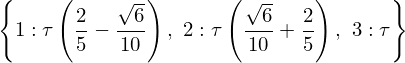

In [10]:
nodes

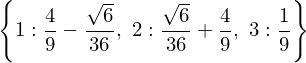

In [11]:
weights

Now let's fit a parabola through the data at the time nodes and get the coefficients of the parabola

In [12]:
A, B, C = symbols("A B C")
p1, p2, p3 = symbols("phi_1 phi_2 phi_3")
t1 = symbols("t_1")

In [13]:
p = A*(t - t1)**2 + B*(t - t1) + C

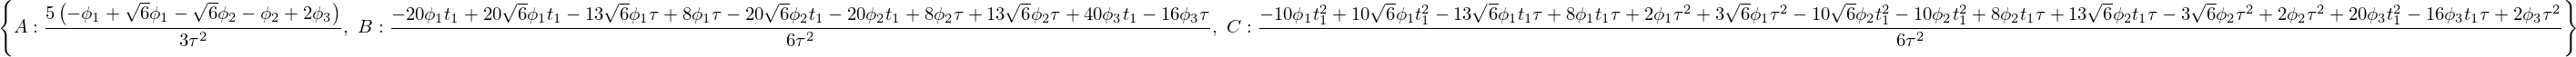

In [14]:
coeffs = solve([p.subs(t, nodes[1])-p1, p.subs(t, nodes[2])-p2, p.subs(t, nodes[3])-p3], [A,B,C], check=False)
coeffs

Now rewrite the polynomial with these coefficients

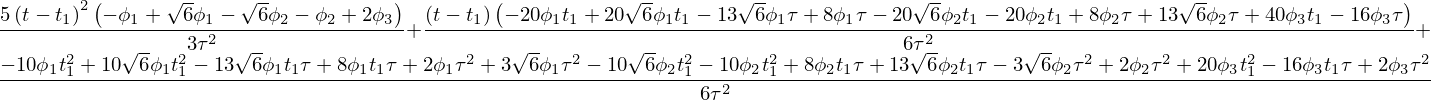

In [15]:
pp = coeffs[A]*(t - t1)**2 + coeffs[B]*(t - t1) + coeffs[C]
pp

### Construct the integrals

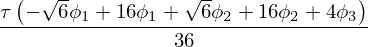

In [16]:
q = integrate(pp, (t, 0, tau))
simplify(q)

This is the expected integral over the whole time range

Integral from $[0, t_1]$

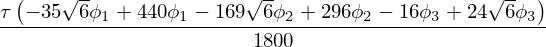

In [17]:
q1 = integrate(pp, (t, 0, nodes[1]))
simplify(q1)

integral from $[t_1, t_2]$

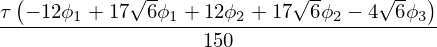

In [18]:
q2 = integrate(pp, (t, nodes[1], nodes[2]))
simplify(q2)

integral from $[t_2, t_3]$

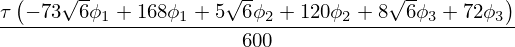

In [19]:
q3 = integrate(pp, (t, nodes[2], nodes[3]))
simplify(q3)

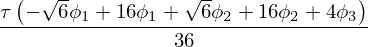

In [20]:
simplify(q1 + q2 + q3)